# Unsupervised Machine Learning: Clustering

**Course:** AI in AEC (Architecture, Engineering, and Construction) Summer School, ETH Zurich.

**Author**: Sophia Kuhn (sophia.kuhn@ibk.baug.ethz.ch)


A common approach at unsupervised learning is cluster analysis. The goal is to group the data items such that items belonging to the same group show comparable properties. There are various algorithms for performing cluster analysis, which can differ in their understanding of clusters or similarity measures.

Many algorithms for clustering data exist. Depending on the use case and properties of the data, one or the other might be better suited. Here, we are going to see two example algorithms: [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) and [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN).

The sklearn python library provides many more models you can use. An overview on those with a graphical representation of their behaviour for different data sets can be found [here](https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods).

### Notebook Content
1. Data set
2. K-Means Algorithm
3. DBSCAN Algorithm

**Appendix:** Choosing k for k-means clustering
1. Elbow Method
2. Silhouette analysis


### Package Installation
The following packages are needed and should be installed.

You can install them by running: <em>pip install pandas matplotlib numpy scikit-learn</em>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.cluster import DBSCAN
from IPython.display import Image

## 1. Data Set

In this tutorial, we will use the concrete data set for the clustering task. 

Explanation of features in the data set [1]:

$$
\begin{array}{ll}
\text { Variable } & \text { Description } \\
\hline \text { Cement } & \mathrm{kg} \text { in a } m^{3} \text { of mixture } \\
\hline \begin{array}{l}
\text { Blast Furnace } \\
\text { Slag }
\end{array} & \mathrm{kg} \text { in a } m^{3} \text { of mixture } \\
\hline \text { Fly Ash } & \mathrm{kg} \text { in a } m^{3} \text { of mixture } \\
\hline \text { Water } & \mathrm{kg} \text { in a } m^{3} \text { of mixture } \\
\hline \text { Superplasticizer } & \mathrm{kg} \text { in a } m^{3} \text { of mixture } \\
\hline \text { Coarse Aggregate } & \mathrm{kg} \text { in a } m^{3} \text { of mixture } \\
\hline \text { Fine Aggregate } & \mathrm{kg} \text { in a } m^{3} \text { of mixture } \\
\hline \text { Age } & \text { Age (in days) of concrete mix } \\
\hline \text { Concrete } & \text { measure in megapascals (MPa) } \\
\text { Compressive } & \\
\text { Strength } & \\
\hline
\end{array}
$$

In [6]:
concrete_full = pd.read_csv('concrete_full.csv') 
# we need to ignore the first column, since it only contains an additional index to the data
concrete_full.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
0,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
1,339.0,0.0,0.0,197.0,0.0,968.0,781.0,7,20.97
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,56,38.33
3,233.8,0.0,94.6,197.9,4.6,947.0,852.2,100,34.56
4,350.0,0.0,0.0,186.0,0.0,1050.0,770.0,28,34.29


In [7]:
concrete_full.describe()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<Axes: >

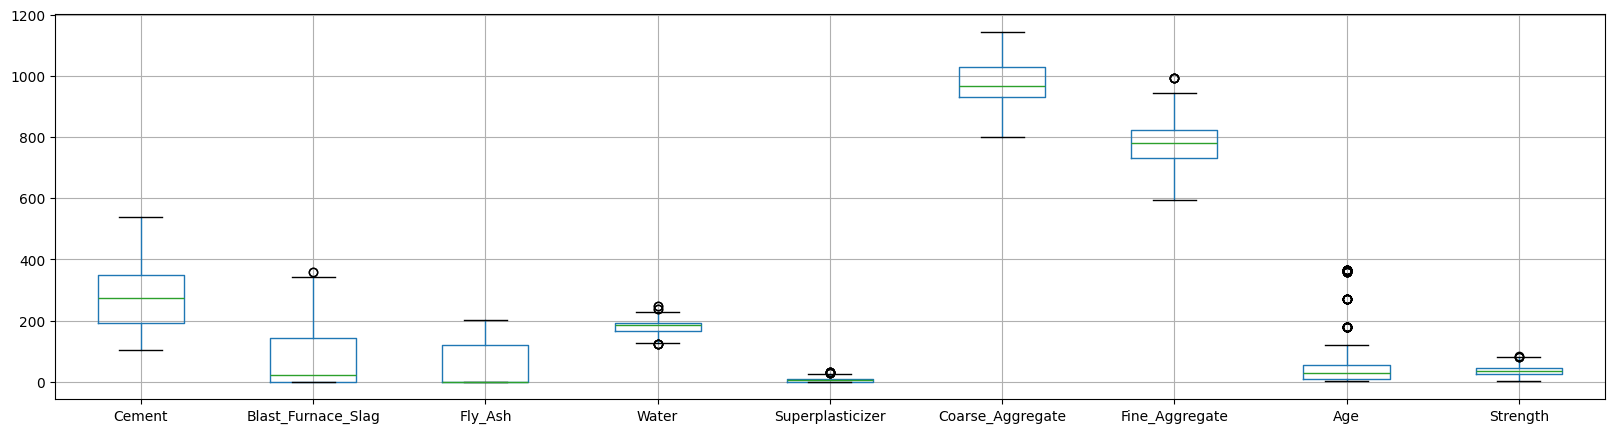

In [8]:
concrete_full.boxplot(figsize=(20,5))

As usual, we scale the data to unit variance and remove the mean.

## 2. KMeans
The Kmeans algorithm tries to find clusters which minimize inertia. This means that within a cluster, the sum-of-squares is minimized:

Cost-Function:

$$C=\sum_{i=1}^{k} \sum_{j=1}^{n} d\left(x_{j}, \mu_{i}\right)=\sum_{i=1}^{k} \sum_{j=1}^{n}\left\|x_{j}-\mu_{i}\right\|^{2}$$


$$\begin{array}{ll}d\left(x_{j}, \mu_{i}\right) & \text { Distance Measure: Euclidian } \\ n & \text { Number of elements (in a cluster) } \\ \boldsymbol{k} & \text { Number of clusters }\end{array}$$

You must provide the number of clusters **k**. To choose a reasonable k-value for the data set at hand, methods such as the **Elbow-Method** and the **Silhouette analysis** are often used. See Appendix for the implementation of these methods.

The algorithm consists of three steps:

*initialisation*

- Choose *k* cluster centers (centroids), e.g. by selecting k random items from the data set.

*optimisation loop*

- assign each sample to its nearest centroid
- for each centroid, compute the mean value of all assigned samples, and use these as new centroids

The optimisation steps are repeated until the change of centroids between steps falls below a certain threshold. 

The algorithm is sensitive to its initial choice in the initialization step. It may converge to different local minima, depending on its initialization. Therefore, it is important to run the algorithm several times with different initializations and then choose the minimum of all results (global minimum). \
Resource: [1]



In [45]:
# choose numner of clusters (see Appendix B)
k=3

In [10]:
kmeans = KMeans(n_clusters=k, random_state=6).fit(concrete_full)
predicted = kmeans.predict(concrete_full)
predicted

array([1, 0, 1, ..., 1, 2, 2])

In [11]:
centroids = kmeans.cluster_centers_
columns_names=concrete_full.columns
centroids_df=pd.DataFrame(centroids, columns=[columns_names])
centroids_df.head(6)

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
0,399.574551,30.601198,26.115569,182.541617,6.276048,959.097605,758.487126,58.071856,42.530329
1,224.798841,11.423188,101.924928,173.622319,7.020000,1016.412754,814.601739,39.063768,29.572609
2,223.901425,176.498291,33.980912,188.449288,5.335328,943.320513,747.622792,40.339031,35.569288


To understand and evaluate the result of the clustering, we are plotting the identified clusters in 2D scatter plots. It is important to understand, that these are 2D projections of the multi-dimensional clusters.

(In Appendix A you can see an example of how PCA can be used to reduce the feature space to 2-dimensions in order to visualize the full multi-dimensional clusters in 2D.)



In [12]:
#defining markers/colors to identify categories
markers=['*', 's', '<', 'o', 'X', 'H', 'p', 'h', '8', 'D', 'd', 'P']
colorName = ['black','red','green','purple','blue', 'orange']


#creating plotting function
def plot_cluster_2D(figNo, n_clusters, clusterPred, clusterCenter, Data, xAxis, yAxis, withOutliers=False):
    #Inputs:
    # figNO: Nr. of Figure
    # n_clusters: nr. of clutsers 
    # clusterPred: predicted clusters
    # clusterC: cluster centers
    # Data: DataFrame
    #xAxis: name of column in the Data that should be plotted on the x axis
    #yAxis: name of column in the Data that should be plotted on the y axis
    # withOutliers: False/ True

    fig = plt.figure(figNo)
    ax = fig.add_subplot(1,1,1)
    
    for j in range(n_clusters):
        #fliter dataset  for current category cluster j
        index = np.flatnonzero(clusterPred == j) # returns all indexes (rows) of the dataframe that belong to the cluster j
        singClusterData= Data.iloc[index,:]
        # extract x and y series
        x=singClusterData[xAxis]
        y=singClusterData[yAxis]
        #create individual scatter plot with color/marker coding of cluster j
        ax.scatter(x ,y,c=colorName[j],s=60,alpha=0.2,marker=markers[j],label="Cluster {}".format(j))
        # plot cluster center of cluster j
        if clusterCenter is not None:
            ax.scatter(clusterCenter[xAxis].loc[j]  ,clusterCenter[yAxis].loc[j],c=colorName[j],s=100,marker='P')#,label="Mean of {}".format(j))

    #end:for j in range noC
    
    #plot Outliers
    if withOutliers==True:
        index = np.flatnonzero(clusterPred == -1)
        for a,i in enumerate(index): # go individually through outlier
            x=Data[xAxis].iloc[i]
            y=Data[yAxis].iloc[i]
            if a==0:
                ax.scatter(x ,y,c='darkviolet',s=60,alpha=1.0,marker="${}$".format(a), label="Outliers")
            else:
                ax.scatter(x ,y,c='darkviolet',s=60,alpha=1.0,marker="${}$".format(a))
    
    
    ax.set_xlabel(xAxis)
    ax.set_ylabel(yAxis)
    ax.grid(True,linestyle='-',color='0.75')
    plt.legend()
    plt.show()
    
#end: def cat_plot_2D()

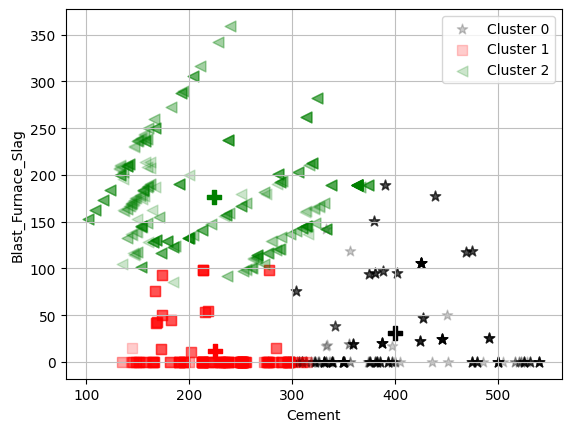

In [13]:
plot_cluster_2D(1, n_clusters=k, clusterPred=predicted, clusterCenter=centroids_df, 
                Data=concrete_full,xAxis="Cement", yAxis='Blast_Furnace_Slag')

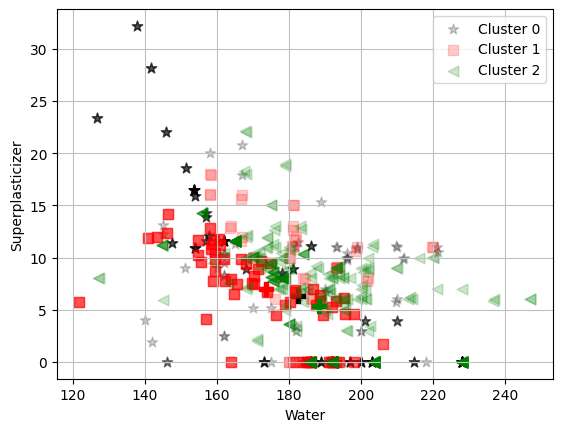

In [14]:
plot_cluster_2D(1, n_clusters=k, clusterPred=predicted, clusterCenter=centroids_df, 
                Data=concrete_full,xAxis="Water", yAxis='Superplasticizer')


Visible is that if no data transformation is applied to the features, the K-means algorithm finds clusters that are well separated in the property such `Cement` and `Blast_Fumace_Slag`, but are not well separated for other properties such as `Water` .

This shows while all properties are considered in the clustering process the properties with the largest value ranges dominate the clustering results. This can be explained by looking at the cost function that the k-means algorithm minimizes. 


$$C=\sum_{i=1}^{k} \sum_{j=1}^{n} d\left(x_{j}, \mu_{i}\right)=\sum_{i=1}^{k} \sum_{j=1}^{n}\left\|x_{j}-\mu_{i}\right\|^{2}$$


$$\begin{array}{ll}d\left(x_{j}, \mu_{i}\right) & \text { Distance Measure: Euclidian } \\ n & \text { Number of elements (in a cluster) } \\ \boldsymbol{k} & \text { Number of clusters }\end{array}$$

The larger absolute distances in the `Cement` feature increases the cost significantly more than the comparably small absolute distances between many other present features (see boxplots below).



--> We will first standardize the data. We scale the data to unit variance and remove the mean.

In [15]:
concrete_full.boxplot(figsize=(20,5))

<Axes: >

In [16]:
#standardize the data
scaler = StandardScaler()
sc_concrete_full = scaler.fit_transform(concrete_full)

In [17]:
kmeans = KMeans(n_clusters=k, random_state=6).fit(sc_concrete_full)
predicted = kmeans.predict(sc_concrete_full)
predicted

array([1, 2, 1, ..., 1, 1, 2])

In [18]:
pd.DataFrame(sc_concrete_full).boxplot(figsize=(20,5))

<Axes: >

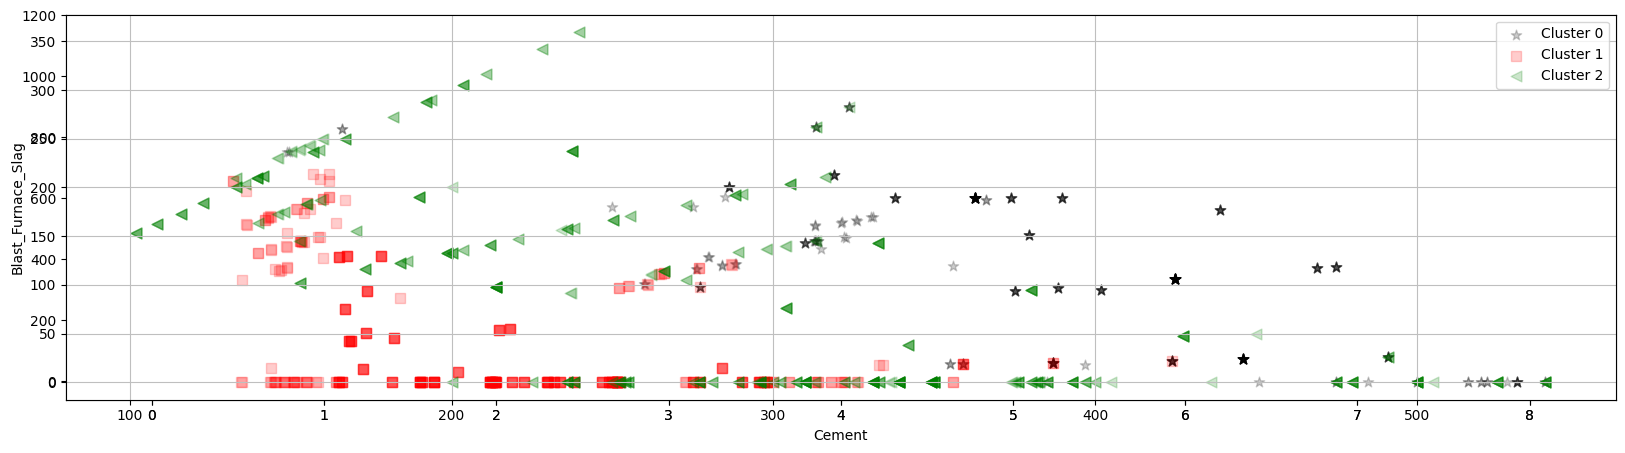

In [19]:
plot_cluster_2D(1, n_clusters=k, clusterPred=predicted, clusterCenter=None, 
                Data=concrete_full,xAxis="Cement", yAxis='Blast_Furnace_Slag')

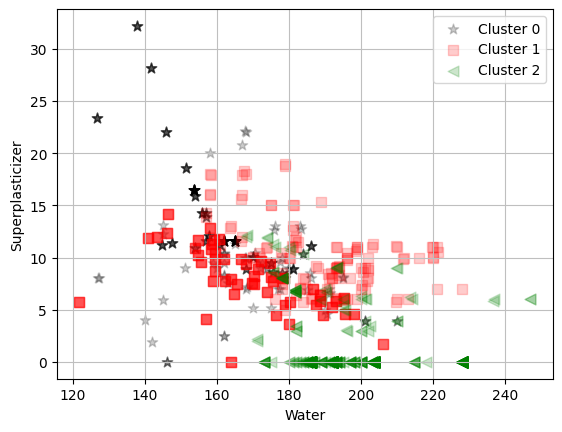

In [21]:
plot_cluster_2D(1, n_clusters=k, clusterPred=predicted, clusterCenter=None, 
                Data=concrete_full,xAxis="Water", yAxis='Superplasticizer')

Now the clusters are well separated in all dimensions.
By standardizing the data before clustering we equalize the contribution of the dimensions in the clustering process. The clustering process is not dominated by the dimensions with large value ranges anymore, rather each dimension is equally considered in the clustering process.


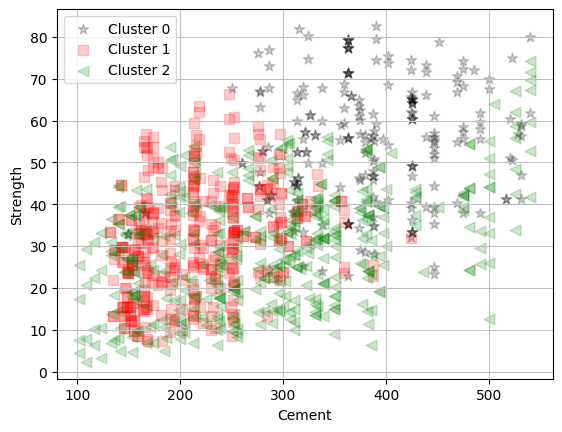

In [23]:
plot_cluster_2D(1, n_clusters=k, clusterPred=predicted, clusterCenter=None, 
                Data=concrete_full,xAxis="Cement", yAxis='Strength')

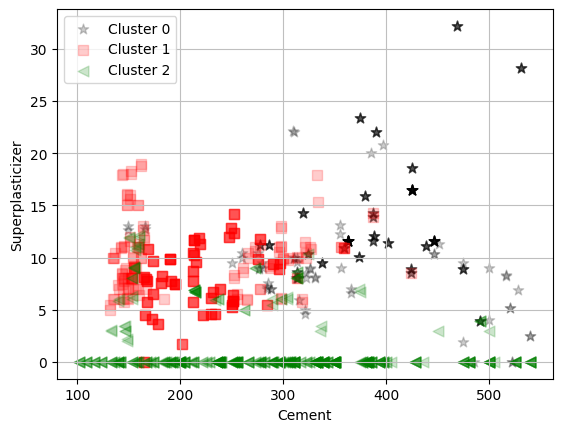

In [24]:
plot_cluster_2D(1, n_clusters=k, clusterPred=predicted, clusterCenter=None, 
                Data=concrete_full,xAxis="Cement", yAxis='Superplasticizer')

## 3. DBSCAN

DBSCAN = Density-Based Spatial Clustering of Applications with Noise

DBSCAN is another algorithm provided by scikit-learn for performing cluster analysis. 


The idea of the DBSCAN algorithm is to separate areas of high density from areas of low density. 

The algorithm needs two parameters:
- ```min_samples``` (default = 5): The number of points needed in the neighbourhood of a point for it to be considered a core point.
- ```eps``` (default = 0.5): The maximum distance between two points s.t. they are considered to be in the neighbourhood of each other.

These two parameters define what we mean by *density*; higher ```min_samples``` and lower ```eps``` indicate higher density necessary to form a cluster.

Resource: [4]


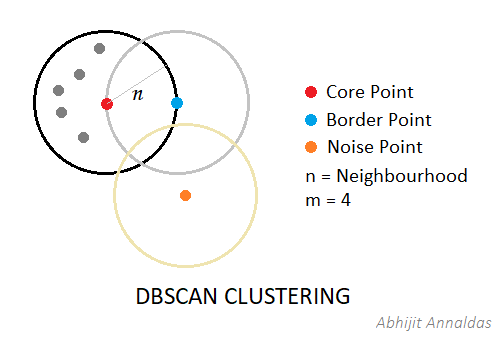

In [27]:
Image("DBSCAN_.png")
# source [5]

###### Comparison KMeans and DBSCAN

While k-means is centroid-based, DBSCAN is a density-based clustering algorithm.

- For the DBSCAN the number of clusters does not need to be defined beforehand. The algorithm can automatically detect the number of clusters present in the data set. 
- DBSCAN clusters do not have to be convex but can have any shape. The KMeans algorithm can only find spherical-convex clusters which tend to have equal sizes.
- While the K-Means algorithm assigns all data points to a cluster the DBSCAN distinguished between clustered points and outliers. 




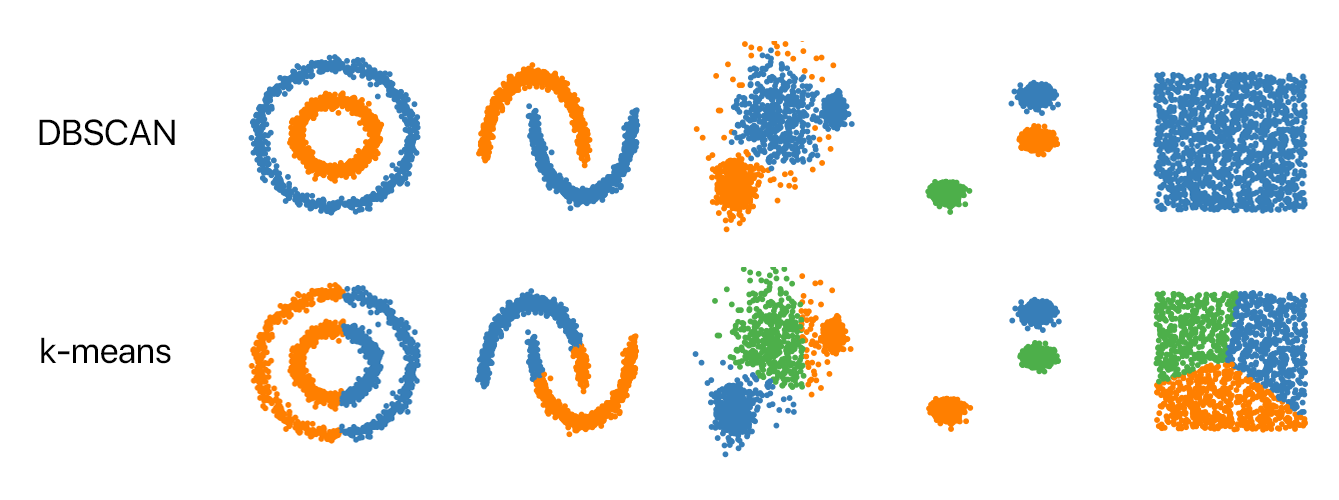

In [28]:
Image("KMeans_vs_DBSCAN.png")
# source [6]

In [25]:
# apply DBSCAN algorithm to our standardized data
db = DBSCAN(eps=0.5, min_samples=8).fit(sc_concrete_full)
labels = db.labels_
print(labels[1:100])

[-1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1]


In [26]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 974


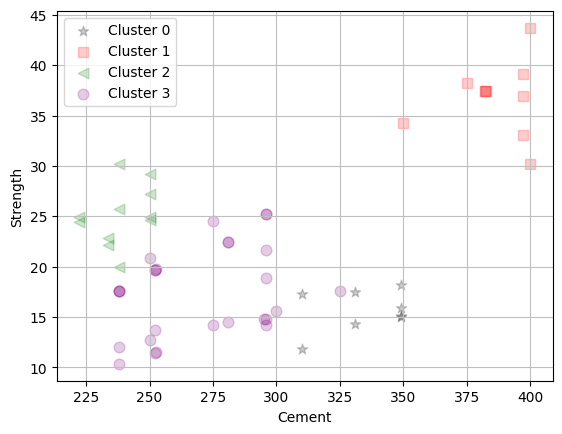

In [27]:
plot_cluster_2D(1, n_clusters=n_clusters_, clusterPred=labels, clusterCenter=None, 
                Data=concrete_full,xAxis="Cement", yAxis='Strength')

Now we increase Epsilon and see what happens:

In [28]:
# apply DBSCAN algorithm to our data 
db = DBSCAN(eps=1.0, min_samples=15).fit(sc_concrete_full)
labels = db.labels_
print(labels[1:100])

[ 1  3  3  1 -1 -1  0 -1  3 -1 -1  0  0 -1 -1  4 -1 -1 -1 -1 -1  5 -1 -1
 -1 -1  4  1 -1 -1 -1  0 -1 -1 -1  1 -1 -1  1  2 -1 -1 -1 -1 -1 -1  1 -1
 -1  1 -1 -1  1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1  1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0 -1 -1 -1 -1 -1 -1 -1  4 -1 -1 -1
 -1 -1 -1]


In [29]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 6
Estimated number of noise points: 721


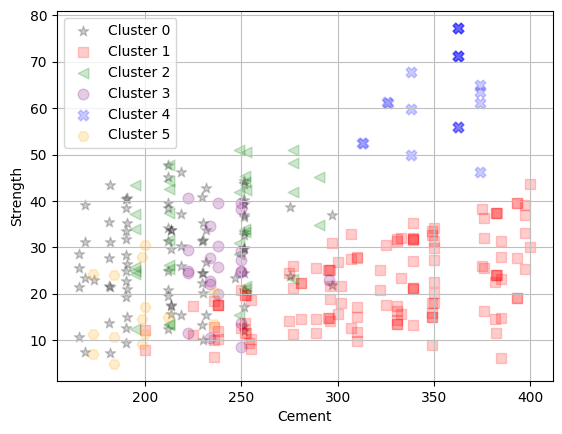

In [31]:
plot_cluster_2D(1, n_clusters=6, clusterPred=labels, clusterCenter=None, 
                Data=concrete_full,xAxis="Cement", yAxis='Strength')

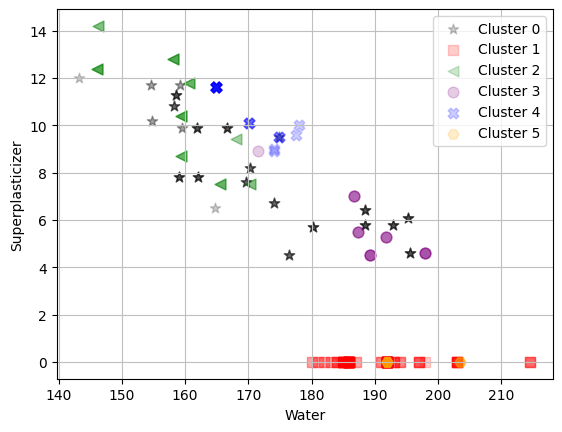

In [32]:
plot_cluster_2D(1, n_clusters=6, clusterPred=labels, clusterCenter=None, 
                Data=concrete_full,xAxis="Water", yAxis='Superplasticizer')

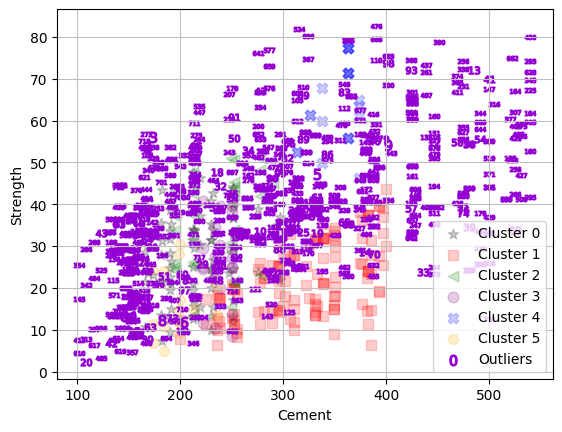

In [33]:
plot_cluster_2D(1, n_clusters=n_clusters_, clusterPred=labels, clusterCenter=None, 
                Data=concrete_full,xAxis="Cement", yAxis='Strength', withOutliers=True)

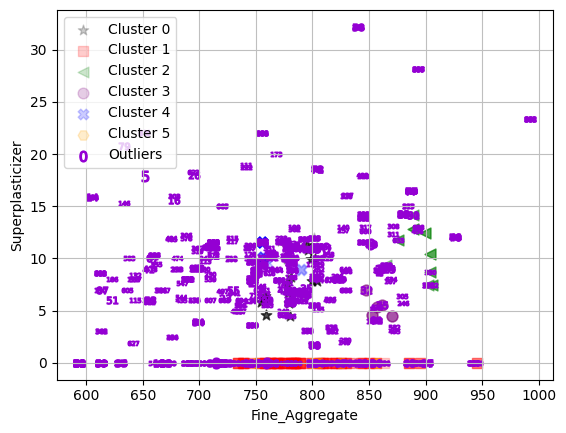

In [34]:
plot_cluster_2D(1, n_clusters=6, clusterPred=labels, clusterCenter=None, 
                Data=concrete_full,xAxis="Fine_Aggregate", yAxis='Superplasticizer', withOutliers=True)

# Appendix




### Choosing k for k-means clustering
#### 1. Elbow Method

A common way of studying which number of clusters would best fit our data is to do an **Elbow-Study**. Basically, we try out some different values for *k* and keep track of the *sum of squared distances*. Each *k* at which this sum begins to flatten (we see an 'elbow' in the plot) represents a good amound of cluster centers. [3]

In [39]:
# Run the Kmeans algorithm and get the index of data points clusters
def elbow_study(data, maxK):
    sse = []
    list_k = list(range(1, maxK))

    for k in list_k:
        km = KMeans(n_clusters=k)
        km.fit(data)
        sse.append(km.inertia_)

    # Plot sse against k
    plt.figure(figsize=(6, 6))
    plt.xticks(list_k)
    plt.plot(list_k, sse, '-o')
    plt.xlabel(r'Number of clusters *k*')
    plt.ylabel('Sum of squared distance')
    plt.show()


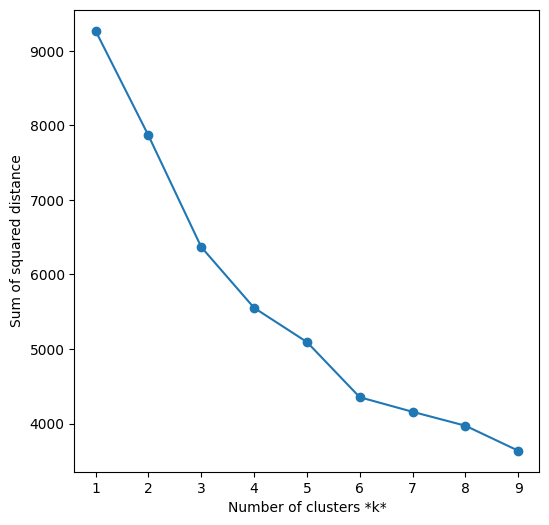

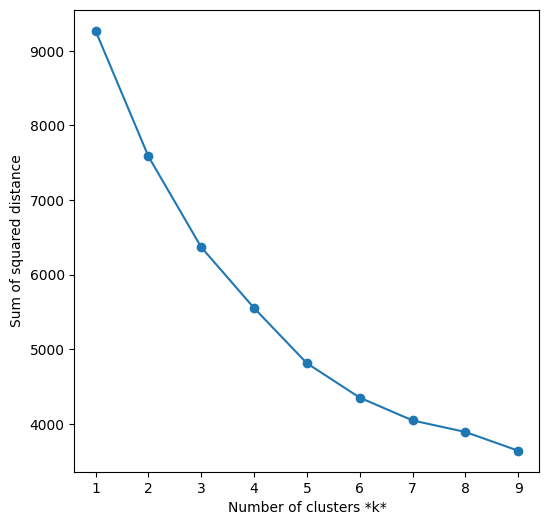

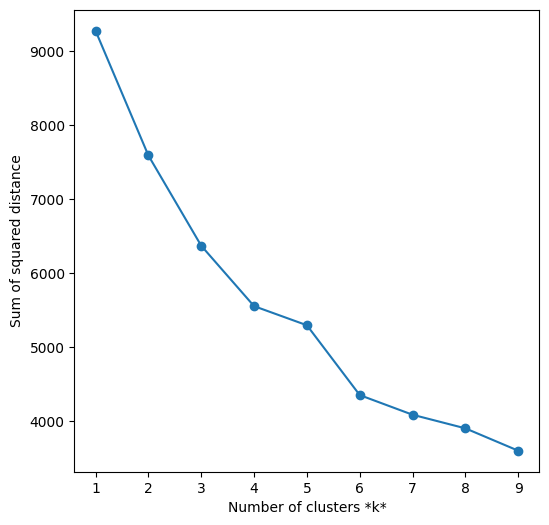

In [40]:
elbow_study(sc_concrete_full, 10)

Unfortunately, we can not really distinguish a clear elbow in this data set. 

#### 2. Silhouette analysis
We can use another approach, silhouette analysis, to get more insights [3]. This approach determines the degree of separation between clusters. For each sample we compute the average distance from all data points in the same cluster (ai) and the average distance from all data points in the closest cluster. From this, we compute the silhouette coefficient: 

$$ \frac{b^{i} - a^{i}}{max(a^i, b^i)} $$

It can take values in the interval [-1,1]. 
- 0 - sample is very close to neighboring clusters
- 1 - sample is far away from neighboring clusters (what we want to achieve)
- -1 - sample is assigned to the wrong cluster

In [43]:
def plot_silhouettes(data, maxK):
    max_avg = 0
    max_k = -1
    for i, k in enumerate(list(range(2, maxK))):
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(10, 4)

        # Run the Kmeans algorithm
        km = KMeans(n_clusters=k)
        labels = km.fit_predict(data)
        centroids = km.cluster_centers_

        # Get silhouette samples
        silhouette_vals = silhouette_samples(data, labels)

        # Silhouette plot
        y_ticks = []
        y_lower, y_upper = 0, 0
        for i, cluster in enumerate(np.unique(labels)):
            cluster_silhouette_vals = silhouette_vals[labels == cluster]
            cluster_silhouette_vals.sort()
            y_upper += len(cluster_silhouette_vals)
            ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
            ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
            y_lower += len(cluster_silhouette_vals)

        # Get the average silhouette score and plot it
        avg_score = np.mean(silhouette_vals)
        ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
        ax1.set_yticks([])
        ax1.set_xlim([-0.1, 1])
        ax1.set_xlabel('Silhouette coefficient values')
        ax1.set_ylabel('Cluster labels')
        ax1.set_title(f'Silhouette plot for k = {k}', y=1.02);
        if avg_score > max_avg:
            max_avg = avg_score
            max_k = k
        plt.show()
    print(f'Maximal average silhouette score is {max_avg} at k = {max_k}')

We plot the silhouette coefficient values for all items in the data set for different values for *k*. In the plots, we can see the distribution of silhouette coefficients for all data points. 
We want to choose in a way that minimises negative points (wrong cluster assigned) and has as many items as possible close to 1.

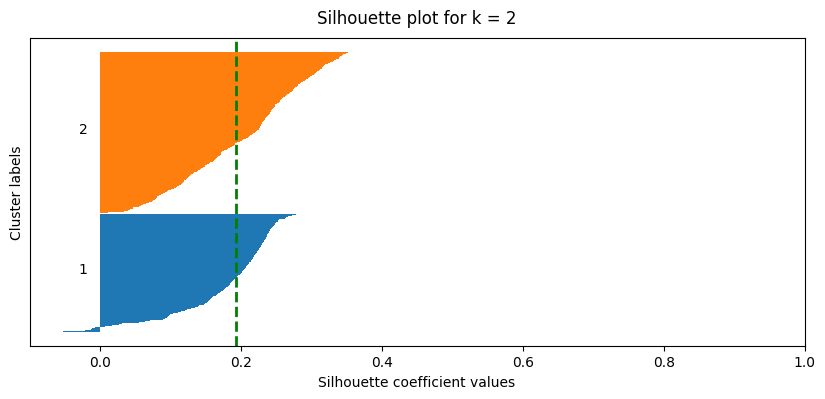

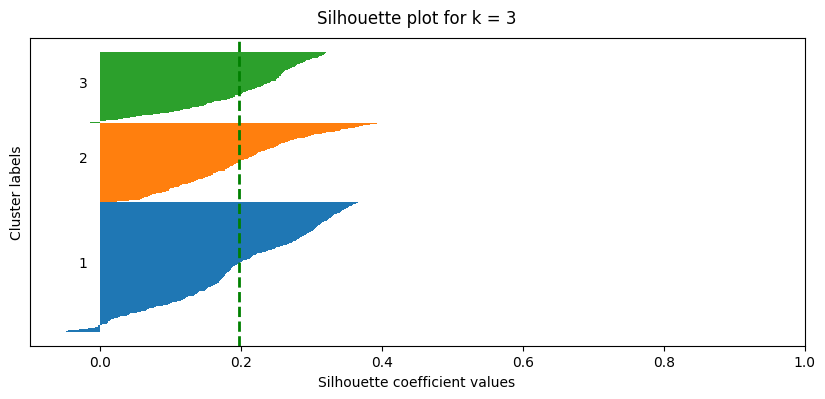

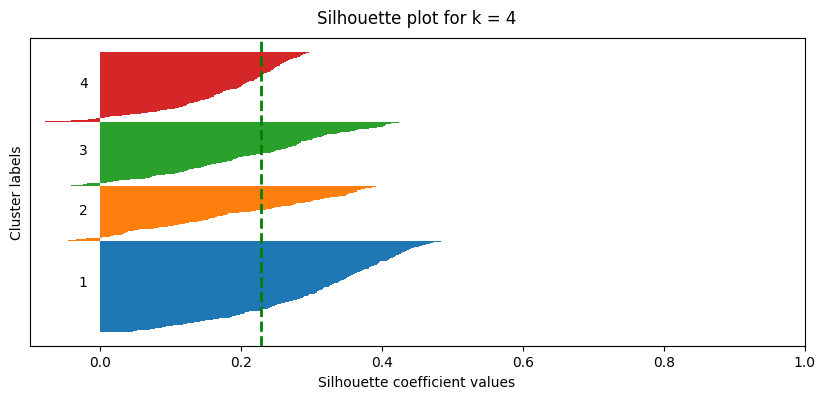

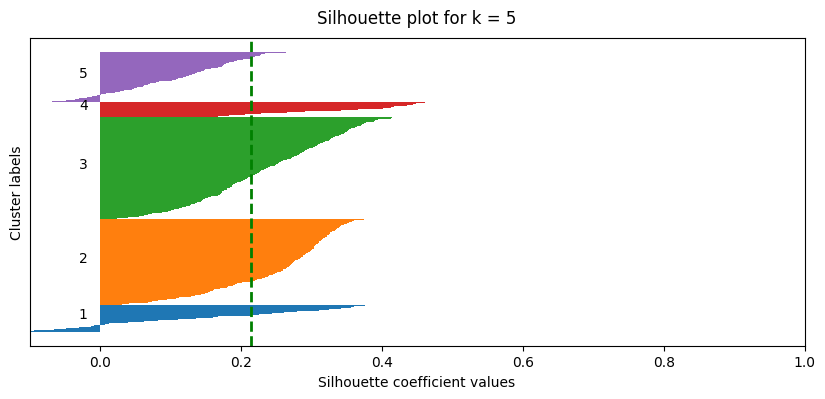

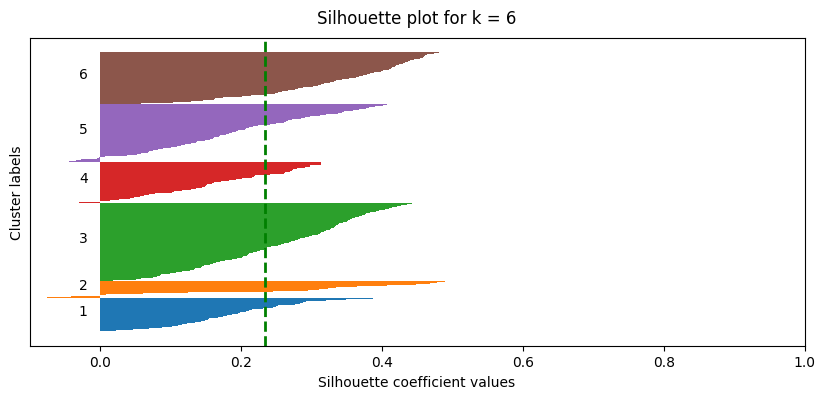

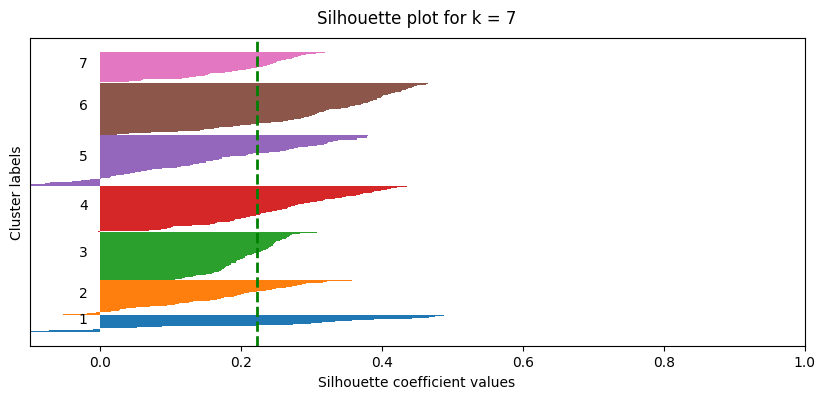

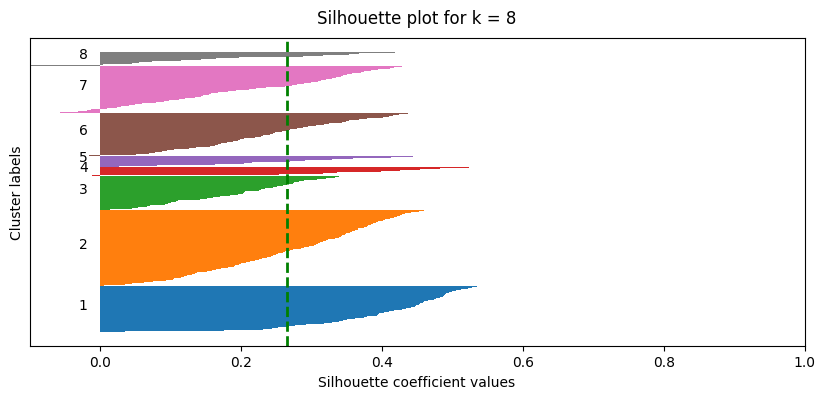

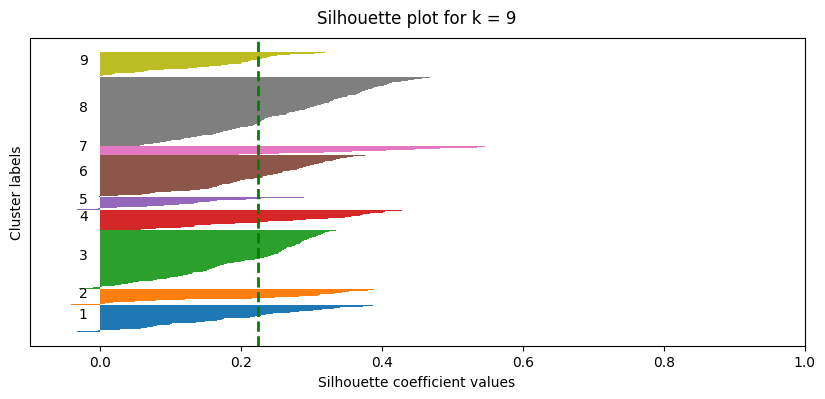

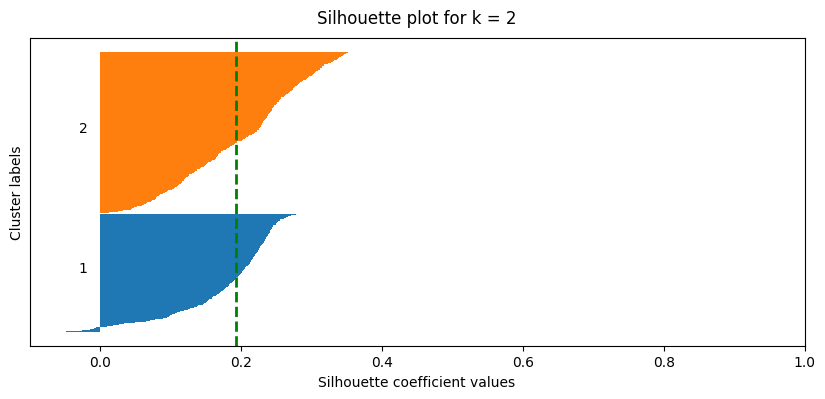

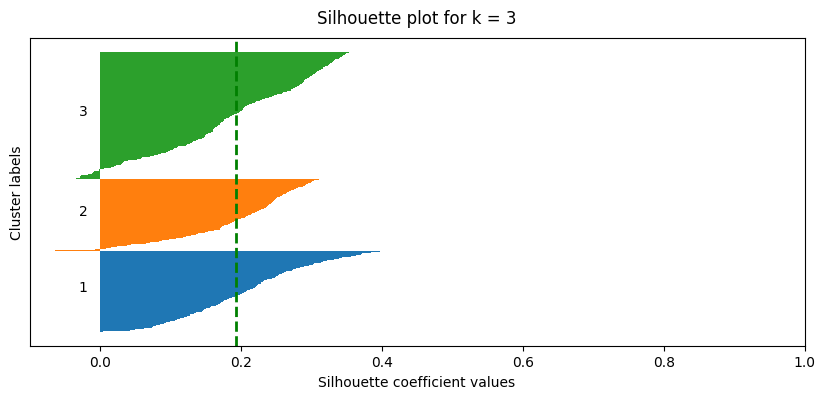

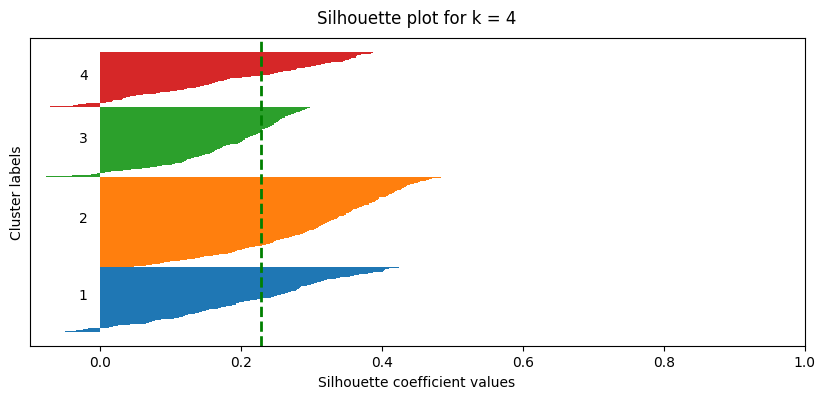

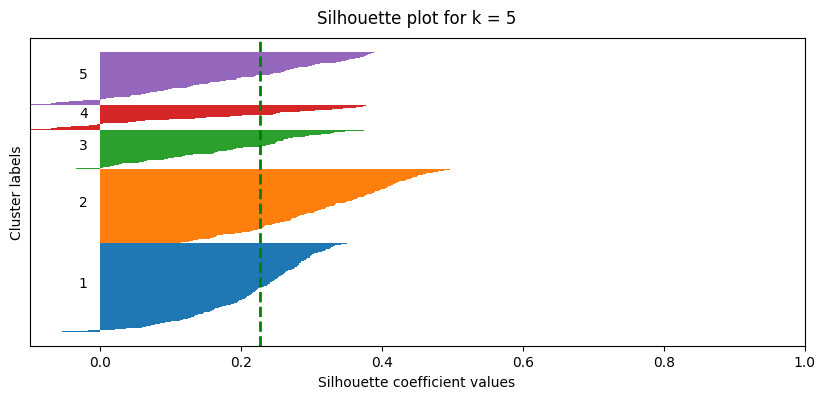

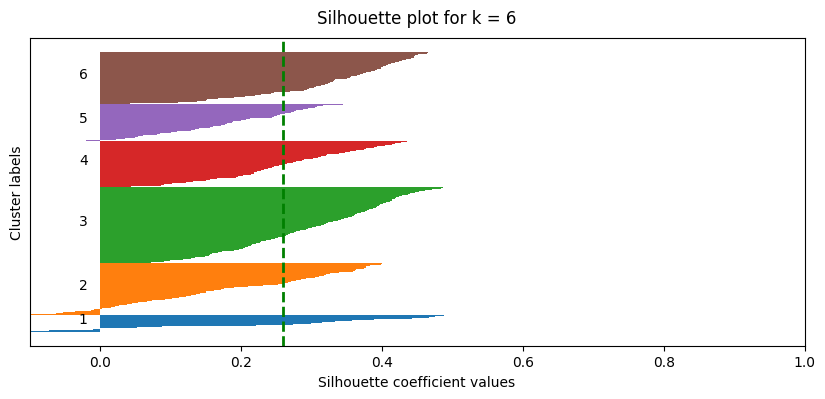

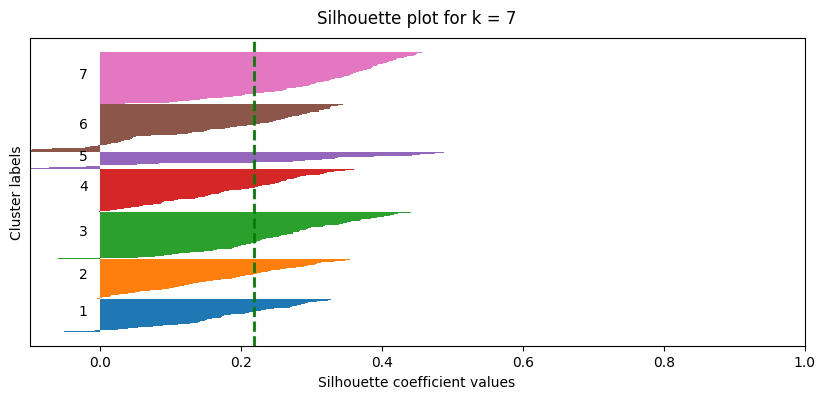

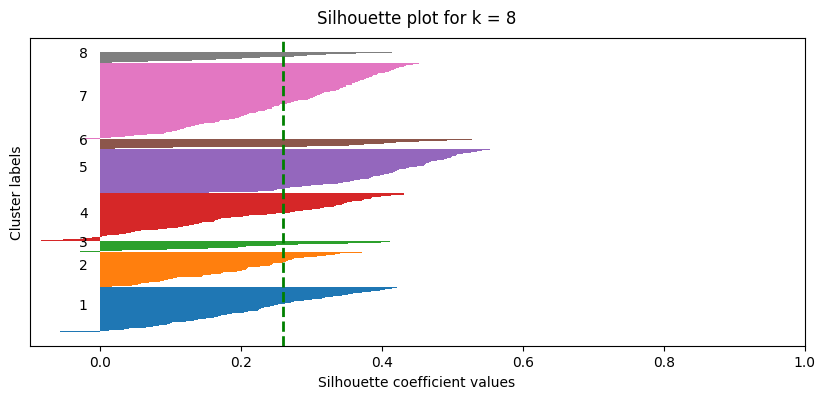

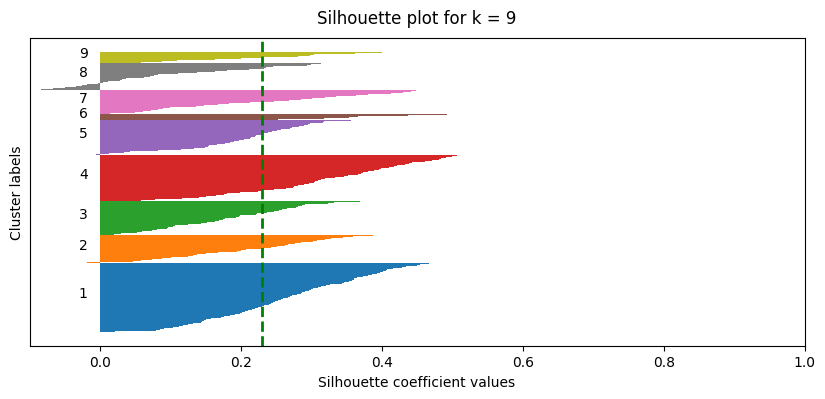

Maximal average silhouette score is 0.2602843415270663 at k = 8


In [44]:
plot_silhouettes(sc_concrete_full, 10)

We decide to use *k = 6* as our number of clusters.